In [58]:
import pandas as pd
from textblob import TextBlob

In [3]:
df = pd.read_table("biden_speech.rtf")

In [4]:
df

,{\rtf1\ansi\ansicpg1252\cocoartf2577
0,\cocoatextscaling0\cocoaplatform0{\fonttbl\f0\...
1,{\colortbl;\red255\green255\blue255;\red0\gree...
2,{\*\expandedcolortbl;;\cssrgb\c0\c0\c0;}
3,\paperw11900\paperh16840\margl1440\margr1440\v...
4,\deftab720
...,...
210,Sustained by faith.\
211,Driven by conviction.\
212,"And, devoted to one another and to this countr..."
213,May God bless America and may God protect our ...


In [5]:
df1 = df.drop(df.index[0:8])

In [6]:
df1.columns = ['text']

In [7]:
df1.head()

,text
8,This is America\'92s day.\
9,This is democracy\'92s day.\
10,A day of history and hope.\
11,Of renewal and resolve.\
12,Through a crucible for the ages America has be...


In [8]:
df1['text'] = df1['text'].str.replace("\\"," ")
df1['text'] = df1['text'].str.replace("}","")

In [27]:
df1

,text,expressions
8,This is America '92s day.,None
9,This is democracy '92s day.,None
10,A day of history and hope.,None
11,Of renewal and resolve.,None
12,Through a crucible for the ages America has be...,None
...,...,...
210,Sustained by faith.,None
211,Driven by conviction.,None
212,"And, devoted to one another and to this countr...",None
213,May God bless America and may God protect our ...,None


In [10]:
#conda install -c conda-forge WordCloud

## Main words in the text

In [26]:
df1['polarity'] = df1['text'].apply(polarity_calc)
df1['subjectivity'] = df1['text'].apply(subjectivity_calc)

In [27]:
Biden_sent = df1.sort_values(by='polarity', ascending=False)

In [28]:
Biden_sent

,text,sentiment,polarity,subjectivity
184,'93The work and prayers uc0 u8232 of centurie...,"(1.0, 0.3)",1.00,0.300
186,If we do this then when our days are through o...,"(1.0, 0.3)",1.00,0.300
149,I promise you this: as the Bible says weeping ...,"(0.8, 0.2)",0.80,0.200
73,"Through the Civil War, the Great Depression, W...","(0.8, 0.75)",0.80,0.750
101,Here we stand looking out to the great Mall wh...,"(0.8, 0.75)",0.80,0.750
...,...,...,...,...
55,Uniting to fight the common foes we face:,"(-0.3, 0.5)",-0.30,0.500
129,Recent weeks and months have taught us a painf...,"(-0.35, 0.575)",-0.35,0.575
188,They healed a broken land. uc0 u8232 My fellow...,"(-0.4, 0.4)",-0.40,0.400
86,"We have never, ever, ever failed in America wh...","(-0.5, 0.3)",-0.50,0.300


In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [20]:
def cloudword(text):
    try:
        text = ""
        for user,content in text.items():
            text += content
        fig,ax = plt.subplots(1,1,figsize=(8,8))
        wordcloud =  WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text)
        plt.imshow(wordcloud)          
        plt.axis('off')
        plt.show()
    except:
        return None

In [ ]:
def cloudword(text):
    try:
        return WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text)
    except:
        return None

TypeError: Image data of dtype object cannot be converted to float

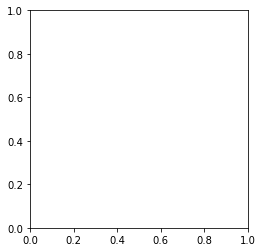

In [21]:
plt.imshow(cloudword)          
plt.axis('off')           
plt.show()

## Other Processing Text tools

In [11]:
def expression(text):
    try:
        return TextBlob(text).noun_phrases
    except:
        return None

In [47]:
df188=df1.text[188]
print(df188)

They healed a broken land. uc0 u8232 My fellow Americans, I close today where I began, with a sacred oath. 


In [53]:
blob188=TextBlob(df188)
blob188.words

WordList(['They', 'healed', 'a', 'broken', 'land', 'uc0', 'u8232', 'My', 'fellow', 'Americans', 'I', 'close', 'today', 'where', 'I', 'began', 'with', 'a', 'sacred', 'oath'])

In [57]:
import nltk
nltk.download('brown')

[nltk_data] Error loading brown: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


False

In [56]:
blob188.noun_phrases


**********************************************************************
  Resource brown not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('brown')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/brown

  Searched in:
    - '/Users/pablofernandezrodriguez/nltk_data'
    - '/opt/anaconda3/nltk_data'
    - '/opt/anaconda3/share/nltk_data'
    - '/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [59]:
blob188.word_counts

defaultdict(int,
            {'they': 1,
             'healed': 1,
             'a': 2,
             'broken': 1,
             'land': 1,
             'uc0': 1,
             'u8232': 1,
             'my': 1,
             'fellow': 1,
             'americans': 1,
             'i': 2,
             'close': 1,
             'today': 1,
             'where': 1,
             'began': 1,
             'with': 1,
             'sacred': 1,
             'oath': 1})

### Attempt to import the whole text together

In [61]:
fulltext = input("biden_speech.rtf")

biden_speech.rtf


In [62]:
fulltext

''

Back to the analysis

In [63]:
blob188.correct()

TextBlob("They healed a broken land. up u8232 By fellow Americans, I close today where I began, with a sacred oath. ")

## Extract contiguous sequences

In [64]:
#conda install -c conda-forge spacy textacy

In [ ]:
import spacy
from textacy.extract import ngrams

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
text = nlp(df188)

In [ ]:
n_grams=2
min_freq=1
pd.Series([n.text for n in ngram(text, n=n_grams, min_freq=1)]).value_counts()

## Frequency of a word in 36 languages

In [65]:
#conda install -c conda-forge wordfreq

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordfreq import word_frequency

In [ ]:
word_frequency("eat","en")

In [ ]:
word_frequency("the","en")

In [ ]:
words = df188.split(" ")

In [ ]:
words_fre = [word_frequency(word,"en") for word in words]

In [ ]:
sns.barplot(words, word_frequencies)

In [ ]:
plt.show()

## Question generator

In [ ]:
from pprint import pprint
import nltk
nltk.download("stopwords")
from Questgen import main

In [ ]:
df188

In [ ]:
qe = main.BoolQGen()
output = qe.predict_boolq(payload)
pprint(output)

In [ ]:
output = qg.predict_shortq(payload)
pprint(output)